In [93]:
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
importlib.reload(Models)
importlib.reload(CI)

batch_date defines the date of the run, the batch_date at the bottom ("Sun Nov 20 14:02:22 CET 2022") is the data used in the thesis

In [165]:
# batch_date = "Thu Nov 17 17:19:48 CET 2022" # fixed alpha and target domain (8 samples val), 2k
# batch_date = "Thu Nov 17 21:30:26 CET 2022" # fixed alpha and target domain (8 samples val), 10k
# batch_date = "Fri Nov 18 13:00:12 CET 2022" # dynamic alpha and target domain (8 samples val), 10k
# batch_date = "Fr 18. Nov 16:58:50 CET 2022" # fixed alpha and target domain (4 samples val, low samples), 10k
batch_date = "Sun Nov 20 14:02:22 CET 2022" # fixed alpha and target domain (8 samples val, full), 10k

In [95]:
table = CI.helper.BrNet_on_BrNet_data_all(batch_date=batch_date, force_reload=False, mode="full", jit_mode=False)

Experiment 1.
no-confounder
0/512
- summary_metrics.confounder_strength=0
- config.target_domain_samples=0
- config.target_domain_confounding=0
- config.de_correlate_confounder_target=0
- config.batch_date=Sun Nov 20 14:02:22 CET 2022
- config.finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... done (0.091s)
Runs synced, models re-created and tested (took 4.444s)

Experiment 2.
no-confounder
2/512
- summary_metrics.confounder_strength=0
- config.target_domain_samples=2
- config.target_domain_confounding=0
- config.de_correlate_confounder_target=0
- config.batch_date=Sun Nov 20 14:02:22 CET 2022
- config.finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... Skipped run: 3864044860804108145  ...  Skipped run: 2707599124275631231  ...  Skipped run: 897847154623748146  ...  Skipped run: 9158213397157011049  ...  done (3.48s)
Runs synced, models re-created and tested (took 7.523s)

Experiment 3.
no-confounder
4/512
- summary_metrics.confound

In [96]:
table

,model,classification_accuracy,classification_accuracy_val,classification_accuracy_diff,confounder_accuracy,random,experiment,summary_metrics.confounder_strength,config.target_domain_samples,config.target_domain_confounding,config.de_correlate_confounder_target,config.batch_date,config.finetuning
0,BrNet_CF-net_features_corr_conditioned_0,0.833984,1.0000,0.166016,0.000000,9215224356256861494,1.\nno-confounder\n0/512,0,0,0,0,Sun Nov 20 14:02:22 CET 2022,0
1,BrNet_CF-net_features_corr_conditioned_0,0.768555,0.9375,0.168945,0.000000,2227782887838313877,1.\nno-confounder\n0/512,0,0,0,0,Sun Nov 20 14:02:22 CET 2022,0
2,BrNet_CF-net_features_corr_conditioned_0,0.840820,0.9375,0.096680,0.000000,5174485691083741841,1.\nno-confounder\n0/512,0,0,0,0,Sun Nov 20 14:02:22 CET 2022,0
3,BrNet_CF-net_features_corr_conditioned_0,0.799805,0.9375,0.137695,0.000000,9123867065947948652,1.\nno-confounder\n0/512,0,0,0,0,Sun Nov 20 14:02:22 CET 2022,0
4,BrNet_CF-net_features_corr_conditioned_0,0.794922,0.9375,0.142578,0.000000,3805184223624373385,1.\nno-confounder\n0/512,0,0,0,0,Sun Nov 20 14:02:22 CET 2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,BrNet_CF-net_labels_entropy_conditioned_0,0.864258,0.8125,-0.051758,0.494141,74952182660739765,8.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Sun Nov 20 14:02:22 CET 2022,1
2459,BrNet_CF-net_labels_entropy_conditioned_0,0.856445,0.8125,-0.043945,0.709961,3869619975827482994,8.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Sun Nov 20 14:02:22 CET 2022,1
2460,BrNet_CF-net_labels_entropy_conditioned_0,0.863281,0.8125,-0.050781,0.494141,5490230610142802559,8.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Sun Nov 20 14:02:22 CET 2022,1
2461,BrNet_CF-net_labels_entropy_conditioned_0,0.842773,0.8125,-0.030273,0.502930,1418012978954605664,8.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Sun Nov 20 14:02:22 CET 2022,1


## All experiments

In [98]:
vmax=None

Text(0.5, 13.699999999999996, 'experiments')

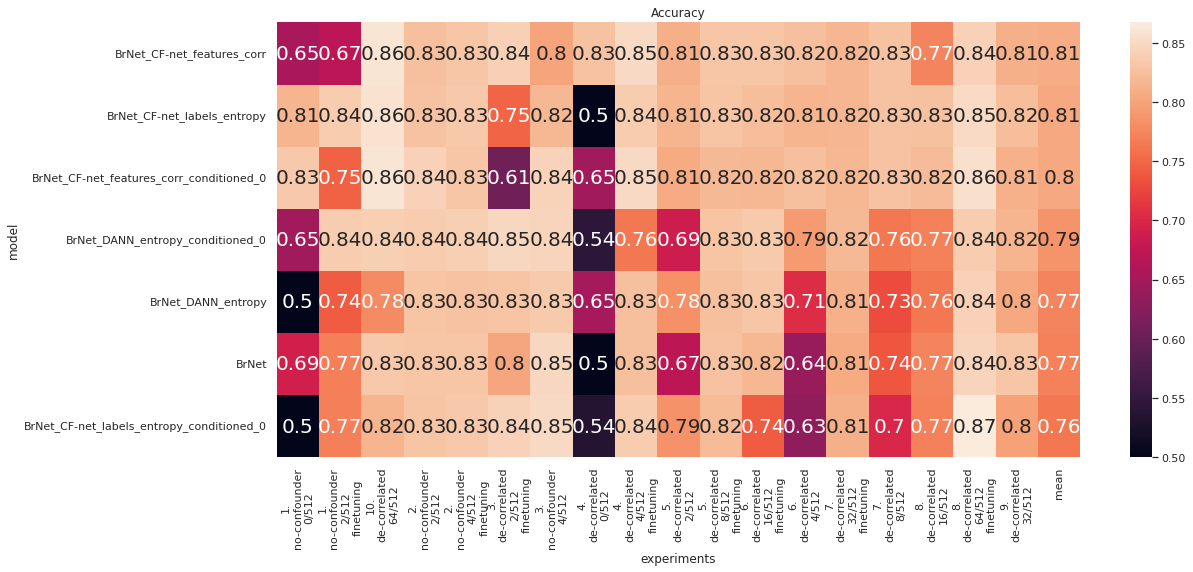

In [155]:
importlib.reload(CI)
sbs.set(font_scale=1)
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table, ax=ax, num=1, agg_func=np.mean, mean=True, vmax=vmax)
ax.set_xlabel("experiments")

## No-Confounder

Text(0.5, 25.299999999999997, 'experiments')

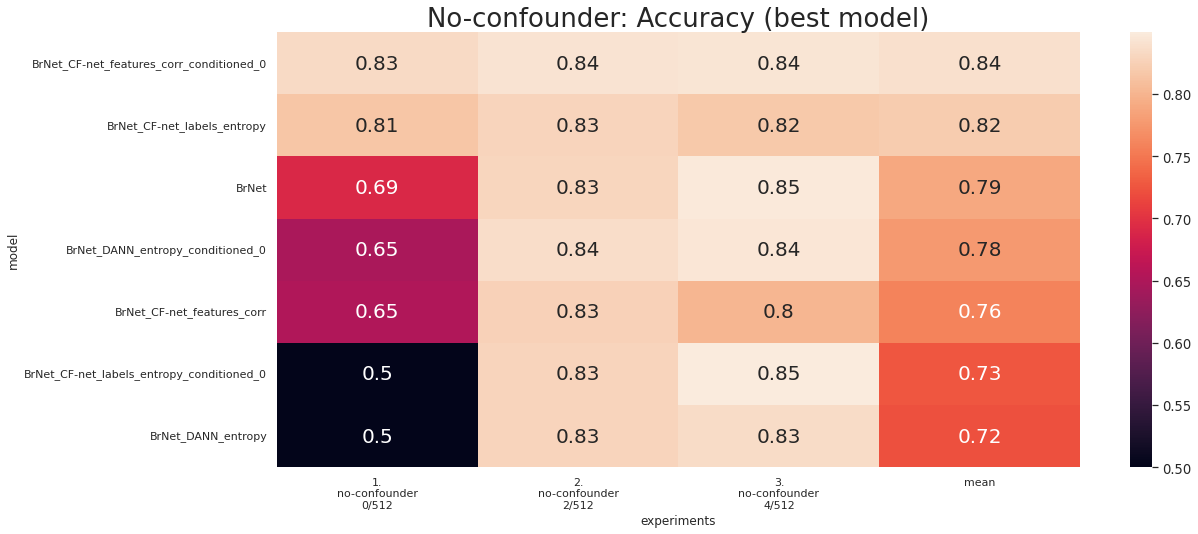

In [156]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("No-confounder: Accuracy (best model)", fontsize=26)
sbs.set(font_scale=1.2)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_confounding"]==0)], ax=ax, num=1, agg_func=np.mean, mean=True, vmax=vmax)
ax.set_xlabel("experiments")

Text(0.5, 12.100000000000001, 'experiments')

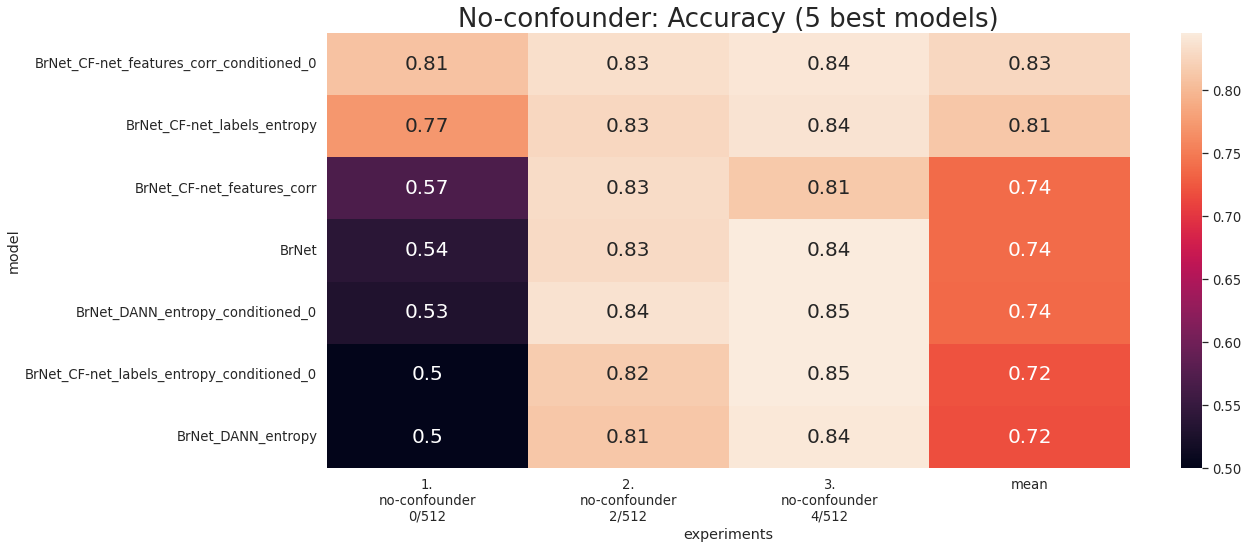

In [157]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("No-confounder: Accuracy (5 best models)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_confounding"]==0)], ax=ax, num=5, agg_func=np.mean, mean=True, vmax=vmax)
ax.set_xlabel("experiments")

Text(0.5, 12.100000000000001, 'experiments')

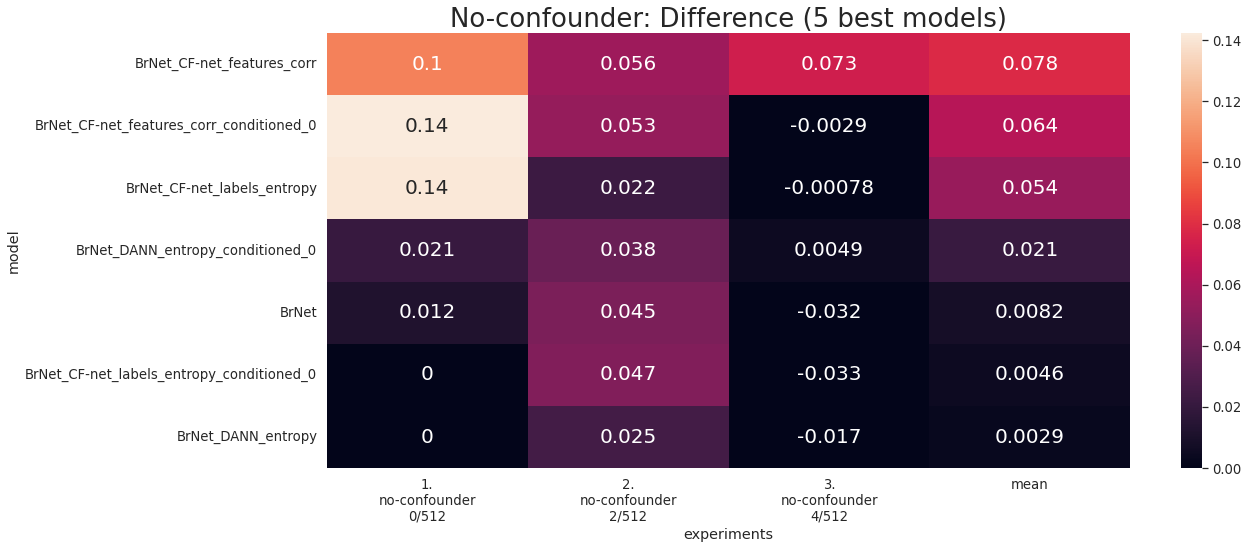

In [158]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("No-confounder: Difference (5 best models)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_confounding"]==0)], ax=ax, num=5, agg_func=np.mean, mean=True, accuracy="classification_accuracy_diff", vmin=0, vmax=vmax)
ax.set_xlabel("experiments")

## De-correlated confounder

Text(0.5, 12.100000000000001, 'experiments')

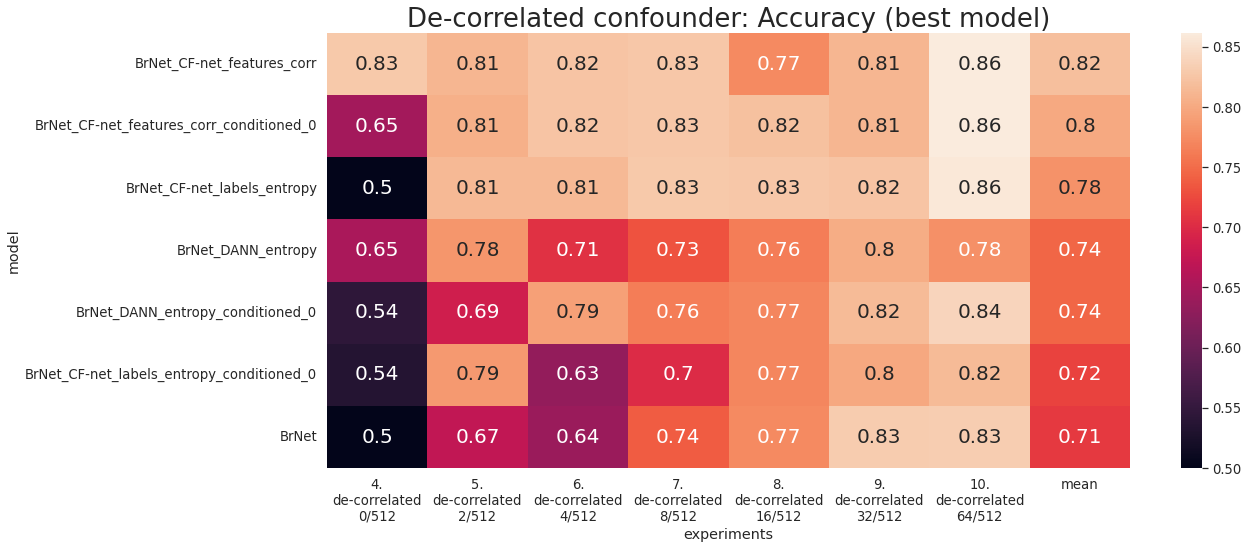

In [159]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("De-correlated confounder: Accuracy (best model)", fontsize=26)
df = CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_confounding"]==1)], ax=ax, num=1, agg_func=np.mean, mean=True, full=True, vmax=vmax)
ax.set_xlabel("experiments")

Text(0.5, 12.100000000000001, 'experiments')

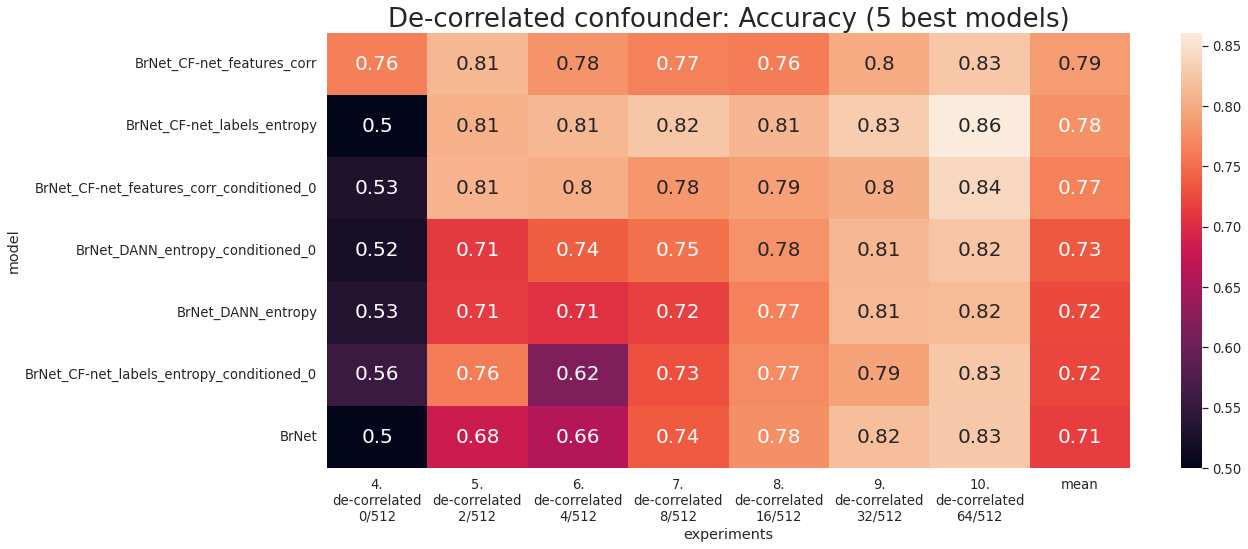

In [160]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("De-correlated confounder: Accuracy (5 best models)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_confounding"]==1)], ax=ax, num=5, agg_func=np.mean, mean=True, full=True, vmax=vmax)
ax.set_xlabel("experiments")

Text(0.5, 12.100000000000001, 'experiments')

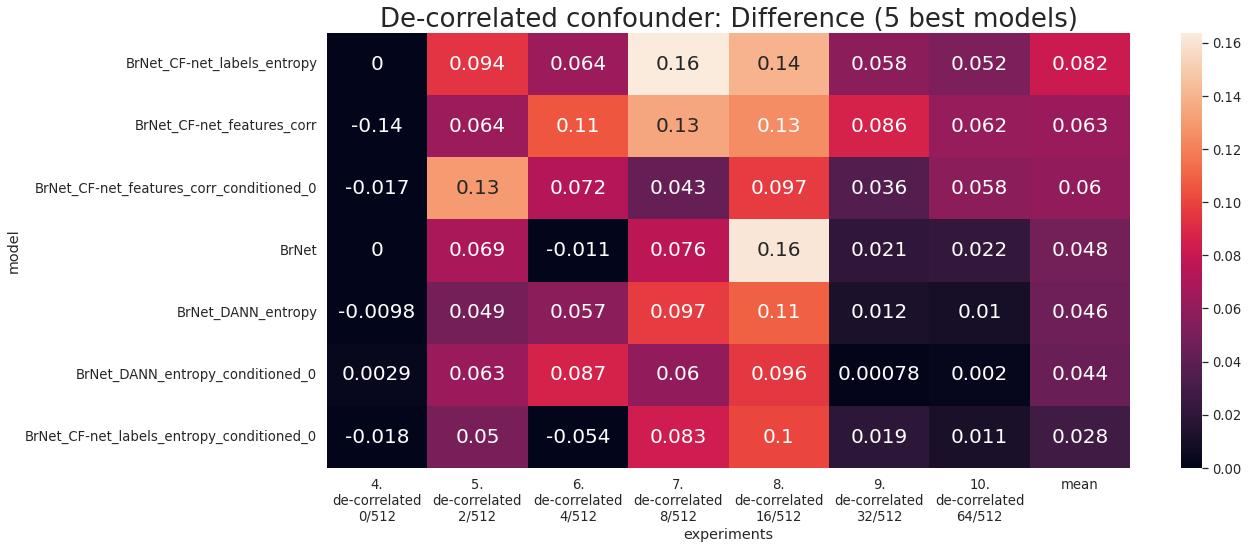

In [161]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("De-correlated confounder: Difference (5 best models)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_confounding"]==1)], ax=ax, num=5, agg_func=np.mean, mean=True, full=True, accuracy="classification_accuracy_diff", vmin=0, vmax=vmax)
ax.set_xlabel("experiments")

## Finetuning

Text(0.5, -4.099999999999994, 'experiments')

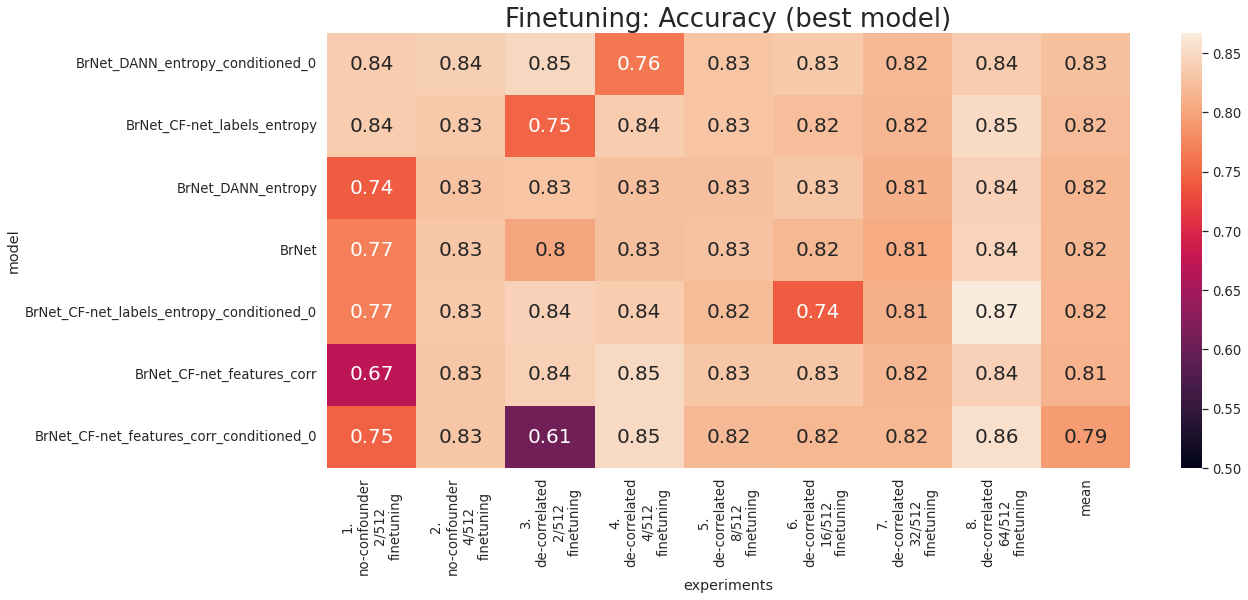

In [162]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("Finetuning: Accuracy (best model)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==1)], ax=ax, num=1, agg_func=np.mean, mean=True, vmax=vmax)
ax.set_xlabel("experiments")

Text(0.5, -4.099999999999994, 'experiments')

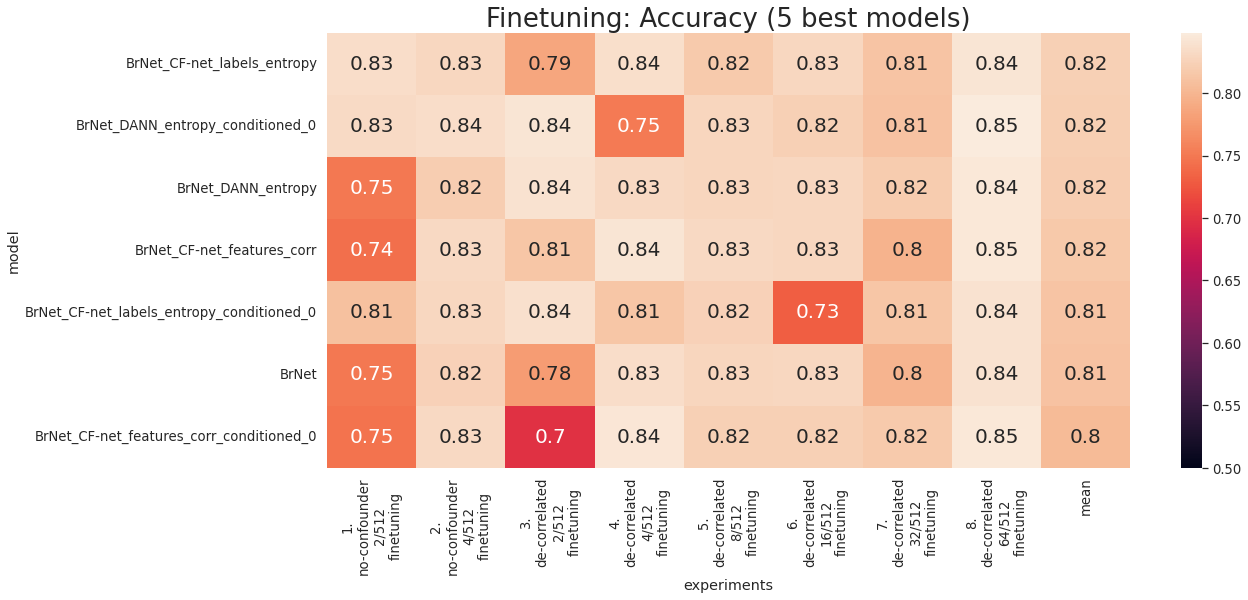

In [163]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("Finetuning: Accuracy (5 best models)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==1)], ax=ax, num=5, agg_func=np.mean, mean=True, vmax=vmax)
ax.set_xlabel("experiments")

Text(0.5, -4.099999999999994, 'experiments')

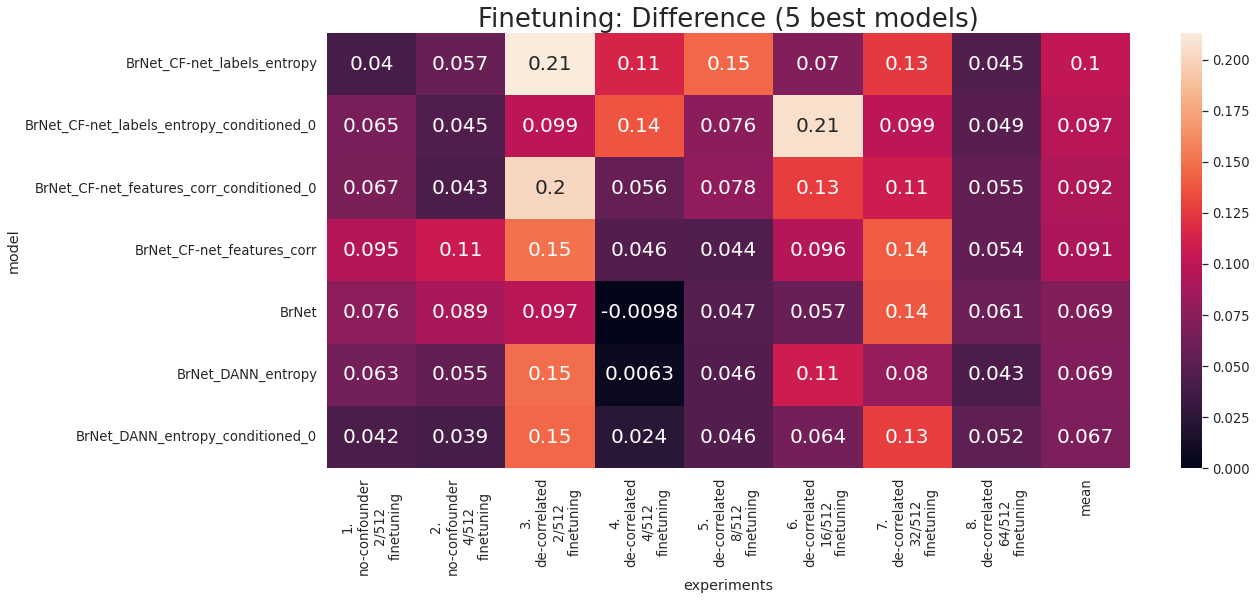

In [164]:
fig, ax = plt.subplots(1,1, figsize=(18,8))
ax.set_title("Finetuning: Difference (5 best models)", fontsize=26)
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==1)], ax=ax, num=5, agg_func=np.mean, mean=True, accuracy="classification_accuracy_diff", vmin=0, vmax=vmax)
ax.set_xlabel("experiments")